# 1. LeNet : 최초의 CNN
```
<img src='image/LeNet.png' alt='LeNet'>
```
![LeNet](image/LeNet.png)

FC(120) : 120개 출력층의 뉴런을 가진 Fully Connected 레이어

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, AvgPool2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, Callback
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
class CustomHistory(Callback):  # on_epoch_end()는 각 에포크 종료시 자동 호출
    def __init__(self, times=5):  # 생성자 함수
        self.epoch = 0
        self.times = times
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch%self.times == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.format(self.epoch, logs.get('loss'), logs.get('accuracy'), logs.get('val_loss'), logs.get('val_accuracy')))
customHistory = CustomHistory(2)

In [3]:
# 출력사이즈 = (입력사이즈 - 커널사이즈)/스트라이드 + 1
class LeNet:
    @staticmethod
    def build(input_shape=(32,32,1), activation='relu'):
        model = Sequential()
        model.add(Input(shape=input_shape))
        model.add(Conv2D(6, #커널갯수
                        kernel_size=(5,5),
                        activation=activation,
                        kernel_initlalize='he_normal',
                        padding='valid',)) # C1층
        model.add(AvgPool2D(pool_size=(2,2),
                           strides=2,)) # C2층
        model.add(Conv2D(16,
                        kernel_size=(5,5),
                        activation=activation,
                        kernel_initializer='he_normal')) # C3층
        model.add(AvgPool2D(pool_size=(2,2),
                           strides=2)) # F4층
        model.add(Flatten())
        model.add(Dense(120,
                       activation=activation,
                       kernel_initializer='he_normal')) # F5층
        model.add(Dense(84,
                       activation=activation,
                       kernel_initializer='he_normal')) # F6층
        model.add(Dense(10,
                       activation='softmax')) # 출력층
        return model

In [4]:
class LeNet:
    @staticmethod
    def build(input_shape = (32, 32, 1), activation = 'relu'):
        model = Sequential([
            Input(shape = input_shape),
            Conv2D(6, 
                   kernel_size = (5, 5),
                   activation = activation,
                   kernel_initializer = 'he_normal',),
            AvgPool2D(pool_size = (2, 2), strides = 2),
            Conv2D(16, 
                   kernel_size = (5, 5),
                   activation = activation,
                   kernel_initializer = 'he_normal',),
            AvgPool2D(pool_size = (2, 2), strides = 2),
            Flatten(),
            Dense(120, activation = 'relu',
                  kernel_initializer = 'he_normal'),
            Dense(84, activation = 'relu',
                  kernel_initializer = 'he_normal'),
            Dense(10, activation = 'softmax') # 출력층
        ])
        return model

In [5]:
model = LeNet.build(input_shape=(28,28,1), activation='relu')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [6]:
# 1. data
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train = X_train.reshape(-1, 28, 28, 1)/255.0
X_test = X_test.reshape(-1, 28, 28, 1)/255.0
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [7]:
# 모델 생성
model = LeNet.build(input_shape=(28,28,1))
# 학습설정
model.compile(loss='sparse_categorical_crossentropy', # 원핫인코딩을 안 하고 분류 분석
             optimizer='adam',
             metrics=['accuracy'])
# 학습
customHistory = CustomHistory(5)
earlystopping = EarlyStopping(patience=10)
hist = model.fit(X_train, y_train,
                validation_split=0.2,
                epochs=50,
                callbacks=[customHistory, earlystopping],
                verbose=0)

epoch:5, loss:0.033674877136945724, acc:0.9889166951179504, val_loss:0.0681220144033432, val_acc:0.9800000190734863
epoch:10, loss:0.014690001495182514, acc:0.9952083230018616, val_loss:0.04735690355300903, val_acc:0.9883333444595337
epoch:15, loss:0.011581243947148323, acc:0.9961249828338623, val_loss:0.04073195531964302, val_acc:0.9901666641235352
epoch:20, loss:0.007924427278339863, acc:0.9972916841506958, val_loss:0.05807514116168022, val_acc:0.9884166717529297
epoch:25, loss:0.004247870296239853, acc:0.9986249804496765, val_loss:0.06935006380081177, val_acc:0.9893333315849304


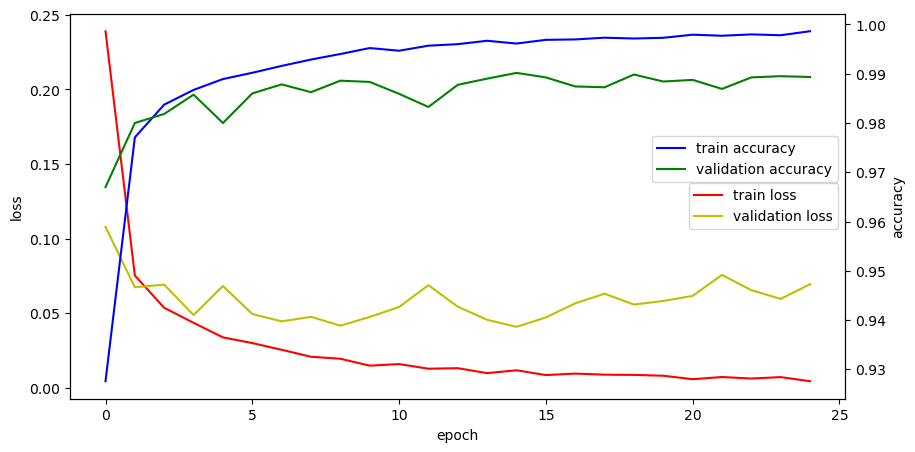

In [8]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'{accuracy*100}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0493 - accuracy: 0.9905
99.04999732971191%


In [10]:
# 예측치와 실제값을 이용한 교차표
yhat = model.predict(X_test).argmax(axis=1)
display(pd.crosstab(y_test, yhat)) # 결과 데이터 프레임
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt +=1
print('예측이 틀린 갯수 :', cnt)

313/313 [==============================] - 1s 2ms/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,975,0,1,0,0,0,3,1,0,0
1,0,1133,0,1,0,0,0,1,0,0
2,0,2,1022,2,0,0,0,6,0,0
3,0,0,1,1007,0,0,0,2,0,0
4,0,0,1,0,974,0,2,0,1,4
5,0,0,0,15,0,873,2,1,1,0
6,2,1,0,0,1,1,953,0,0,0
7,0,2,6,1,1,0,0,1017,0,1
8,1,0,3,2,0,0,1,2,961,4


예측이 틀린 갯수 : 95


i = 3559
cnt = 50


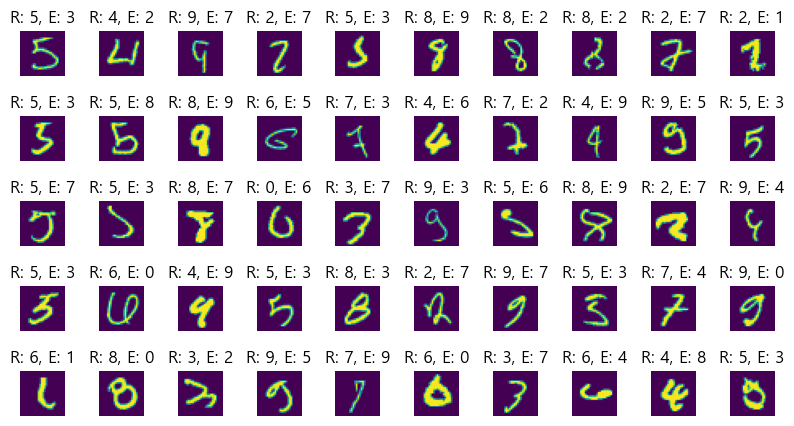

In [11]:
plt_row = 5
plt_col = 10
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic') # 윈도우즈
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.2)

i = 0 # yhat과 y_test를 access할 index
cnt = 0 # 예측 실패 횟수
while(cnt < plt_row * plt_col) & (i < len(y_test)):
    # 예측 실패한 경우만 imshow(X_test[i]), 
    # 실제값(y_test)과 예측치(yhat)를 title에 출력
    if yhat[i] == y_test[i]:
        i += 1
        continue
    # 예측 실패한 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(28, 28))
    title = 'R: {}, E: {}'.format(y_test[i], yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i =', i)
print('cnt =', cnt)

# 2. AlexNet
- GPU를 사용하여 실현 가능한 모델. 알렉스와 제프리힌튼이 공동 설계한 CNN 아키텍처 이름

In [12]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.10.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, AvgPool2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization # 배치 정규
# from tensorflow.keras.callbacks import EarlyStopping, Callback
# import pandas as pd
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
# 출력사이즈 = (입력사이즈 - 커널사이즈) / 스트라이드 + 1
class AlexNet:
    @staticmethod
    def build(input_shape=(224, 224, 3), activation='relu', class_num=1000):
        model = Sequential([
            Input(shape=input_shape),
            Conv2D(96,  # 커널갯수
                   kernel_size=(11, 11),
                   strides=(4, 4),
                   activation=activation,
                   padding='same'),  # 두 번째 MaxPooling 오류 방지를 위함
            MaxPooling2D(pool_size=(3, 3), strides=2),
            BatchNormalization(),  # 배치졍규화
            Conv2D(256, kernel_size=(5, 5), activation=activation, padding='same'),
            MaxPooling2D(pool_size=(3, 3), strides=2),
            BatchNormalization(),
            Conv2D(384, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(384, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(256, kernel_size=(3, 3), activation=activation, padding='same'),
            # AlexNet은 224*224 이미지에 맞춰서 3*3 pooling이 되나,
            # cifar 32*32 이미지에서는 아래의 MaxPooling단계는 생략
            MaxPooling2D(pool_size=(3, 3), strides=2),
            Flatten(),            
            Dense(units=4096, activation=activation),
            Dropout(0.5),
            Dense(units=4096, activation=activation),
            Dropout(0.5),
            Dense(units=class_num, activation='softmax')  # 출력층
        ])
        return model

In [15]:
# 1. 데이터 (원핫인코딩 X)
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


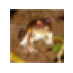

In [16]:
plt.figure(figsize=(0.7,0.7))
plt.imshow(X_train[0])
plt.axis('off')
y_train[0]
plt.show()

In [17]:
# 스케일 조정
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [18]:
# 2. 모델
# model = AlexNet.build(input_shape=(32,32,3), class_num=10)
model = Sequential([
            Input(shape=(32,32,3)),
            Conv2D(96, # 커널갯수
                   kernel_size=(11,11), strides=(4,4),
                   activation='relu',
                   padding='same'
                  ), # => 파라미터수 : 11*11*96*3(채널수) + 96(출력수) = 34,944
            MaxPooling2D(pool_size=(3,3), strides=2),
            BatchNormalization(), # 배치 정규화
            
            Conv2D(384, kernel_size=(3,3), activation='relu',
                  padding='same'), # => 파라미터수 : 96*3*3*384 + 384 = 332,160
            Conv2D(256, kernel_size=(3,3), activation='relu',
                  padding='same'), # => 파라미터수 : 384*3*3*256 + 256

            Flatten(),
            Dense(units=1024, activation='relu'),
            Dropout(0.3),
            Dense(units=512, activation='relu'),
            Dropout(0.3),
            Dense(units=10, activation='softmax')
        ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 96)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 3, 3, 96)         384       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 384)         332160    
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 256)         884992    
                                                                 
 flatten_2 (Flatten)         (None, 2304)             

In [19]:
# 3. 학습설정
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
hist = model.fit(X_train, y_train,
                epochs=20,
                validation_data=[X_test, y_test])

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6333 - accuracy: 0.4081 - val_loss: 1.5282 - val_accuracy: 0.4514
Epoch 2/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.3390 - accuracy: 0.5276 - val_loss: 1.3660 - val_accuracy: 0.5183
Epoch 3/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.2143 - accuracy: 0.5768 - val_loss: 1.4052 - val_accuracy: 0.4922
Epoch 4/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1022 - accuracy: 0.6170 - val_loss: 1.2474 - val_accuracy: 0.5702
Epoch 5/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0080 - accuracy: 0.6515 - val_loss: 1.2048 - val_accuracy: 0.5854
Epoch 6/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9336 - accuracy: 0.6735 - val_loss: 1.1835 - val_accuracy: 0.6027
Epoch 7/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8536 - accuracy: 0.7021 - val_loss: 1.2638 - val_ac

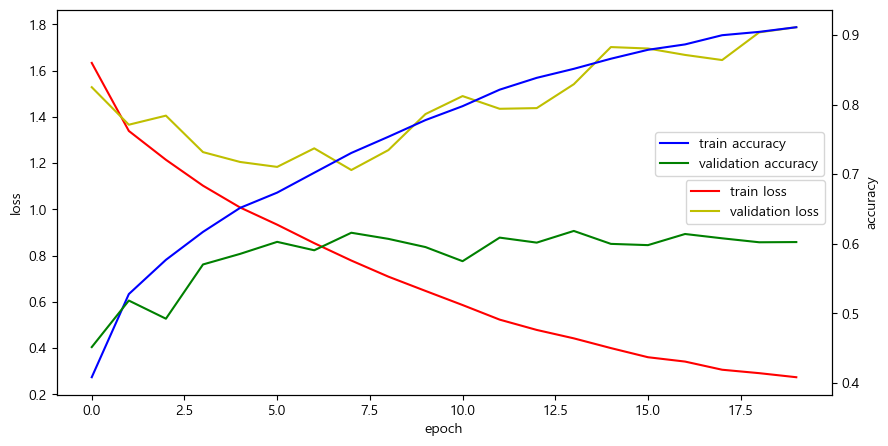

In [20]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [21]:
# 5. 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print('loss :', loss)
print('accuracy :', accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.7876 - accuracy: 0.6024
loss : 1.7876313924789429
accuracy : 0.602400004863739


In [28]:
# 5. 모델 평가 : 교차표
# airplane(0), automobile(1), bird(2), cat(3), deer(4), dog(5), frog(6), horse(7), ship(8), truck(9)
# y_test.reshape(-1) # 실제값을 1차원으로 변경
y_hat = np.argmax(model.predict(X_test), axis=1)
ctab = pd.crosstab(y_test.reshape(-1), y_hat)
ctab.columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
ctab.columns.name = 'predict'
ctab.index = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
ctab.index.name = 'real'
ctab

313/313 [==============================] - 1s 3ms/step


predict,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
real,,,,,,,,,,
airplane,720,30,55,23,11,7,12,4,107,31
automobile,45,754,16,21,4,8,14,6,43,89
bird,78,24,553,80,74,42,85,26,20,18
cat,36,30,90,453,64,124,107,44,27,25
deer,62,10,163,63,491,41,73,57,27,13
dog,42,13,116,225,39,371,68,79,26,21
frog,23,19,55,70,47,32,719,7,17,11
horse,51,20,70,70,58,57,13,608,10,43
ship,96,56,13,26,8,5,5,4,759,28


array([8], dtype=uint8)

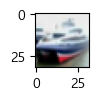

In [39]:
# 6. 모델 사용하기
plt.figure(figsize=(0.7, 0.7))
plt.imshow(X_test[1])
y_test[1]

In [37]:
pred = model.predict(X_test[1].reshape(-1, 32, 32, 3)).argmax(axis=1)
pred

1/1 [==============================] - 0s 21ms/step


array([1], dtype=int64)

# 3. VGGNet
- 옥스퍼드 대 VGG팀에서 구현한 CNN(컨볼루션과 맥스폴링 19개층)
- VGG-19 구현

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
import cv2
import matplotlib.pyplot as plt

In [2]:
class Vgg19:
    @staticmethod
    def build(input_shape=(224, 224, 3), activation='relu'):
        model = Sequential([
            Input(shape=(input_shape)),
            Conv2D(64, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(64, kernel_size=(3, 3), activation=activation, padding='same'),
            MaxPooling2D(),
            Conv2D(128, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(128, kernel_size=(3, 3), activation=activation, padding='same'),
            MaxPooling2D(),
            Conv2D(256, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(256, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(256, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(256, kernel_size=(3, 3), activation=activation, padding='same'),
            MaxPooling2D(),
            Conv2D(512, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(512, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(512, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(512, kernel_size=(3, 3), activation=activation, padding='same'),
            MaxPooling2D(),
            Conv2D(512, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(512, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(512, kernel_size=(3, 3), activation=activation, padding='same'),
            Conv2D(512, kernel_size=(3, 3), activation=activation, padding='same'),
            MaxPooling2D(),
            Flatten(),
            Dense(units=4096, activation='relu'),
            Dense(units=4096, activation='relu'),
            Dense(units=1000, activation='softmax')
        ])
        return model

In [3]:
model = Vgg19.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [4]:
vggModel = VGG19() # 학습을 하지 않고 imageNet으로 학습이 끝난 model*weights 내려받아 가중치만 사용
weights = vggModel.get_weights()
model.set_weights(weights=weights) # 학습이 끝난 가중치를 model에 이식
# 추가적인 재학습도 가능함

574710816/574710816 [==============================] - 56s 0us/step


In [9]:
# model.predict(읽어온이미지를 224*224*3 넘파이배열)
# 예측하기 위해 이미지를 읽어 -> 사이즈 조정(openCV라이브러리: pip install opencv-python)
# 방법 1 
img_cv2 = cv2.imread('data/sample.jpg',
                   cv2.IMREAD_COLOR, # BGR 포맷 알파(투명도)채널 무시
                   #cv2.IMREAD_UNCHANGED, # 투명도까지 그대로 읽어옴
                   #cv2.IMREAD_GRAYSCALE, #흑백으로 읽음
                   )
img_cv2 = cv2.resize(img_cv2, dsize=(224,224), # INTER_NEAREST 보간법을 이용하여 사이즈 조정
                    interpolation=cv2.INTER_NEAREST) 
cv2.imshow('sample', img_cv2)
cv2.waitKey(0) # 키보드 입력을 기다림 이미지가 화면에 표시된 상태를 유지
cv2.destroyAllWindows() # openCV를 통해 생성된 모든 창을 닫음
img_cv2.shape

(224, 224, 3)

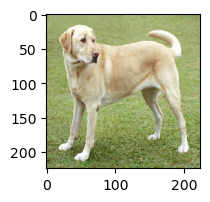

In [13]:
plt.figure(figsize=(2,2))
# BGR 포맷인 img_cv2를 RGB 포맷으로 바꾸기
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB) 
plt.imshow(img_cv2_rgb)
plt.show()

In [15]:
# 방법 2
from tensorflow.keras.preprocessing import image
img = image.load_img('data/sample.jpg', target_size=(224,224))
print(type(img))
img_data = image.img_to_array(img)
print('읽어온 img_data :', type(img_data))

<class 'PIL.Image.Image'>
읽어온 img_data : <class 'numpy.ndarray'>


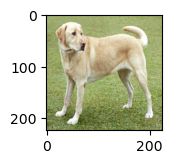

In [16]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(img)
plt.show()

(numpy.ndarray, (224, 224, 3))

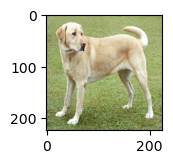

In [18]:
# 방법 3
img_data1 = plt.imread('data/sample.jpg')
img_data1 = cv2.resize(img_data1, dsize=(224,224),
                      interpolation=cv2.INTER_NEAREST) # 사이즈 조정
plt.figure(figsize=(1.5,1.5))
plt.imshow(img_data1)
type(img_data1), img_data1.shape

In [19]:
img_data.shape, img_data1.shape

((224, 224, 3), (224, 224, 3))

In [23]:
# 차원변경 (224, 224, 3) > (1, 224, 224, 3) 으로 
import numpy as np
a = np.array([1,2,3])
print('a 배열의 축 추가(3행 1열) : \n', a[:, np.newaxis])
print('a 배열의 축 추가(1행 3열) : \n', a[np.newaxis, :])

a 배열의 축 추가(3행 1열) : 
 [[1]
 [2]
 [3]]
a 배열의 축 추가(1행 3열) : 
 [[1 2 3]]


In [26]:
# 예측하기
pred = model.predict(img_data[np.newaxis, ...])
pred.argmax()

1/1 [==============================] - 0s 26ms/step


208

In [32]:
from tensorflow.keras.applications.vgg19 import decode_predictions
result = decode_predictions(pred, top=5)[0]
for row in result:
    print(f'{row[1]}일 확률 : {round(row[2]*100, 2)}%')

Labrador_retriever일 확률 : 86.15%
kuvasz일 확률 : 8.55%
Weimaraner일 확률 : 1.46%
bloodhound일 확률 : 0.8%
Great_Pyrenees일 확률 : 0.49%


# 4. 인셉션 모듈
- 교안 55pg
    - 1x1 컨볼루션을 하는 이유 : 채널 수를 줄여 연산속도를 높이려고

In [1]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import concatenate

In [3]:
model_input = Input(shape=(28,28,3))
pre = Dense(192)(model_input)
conv1 = Conv2D(64, # 커널(필터) 갯수
               1, # 커널 사이즈
               padding='same')(pre)
conv2 = Conv2D(128,
              3,
              padding='same')(pre)
conv3 = Conv2D(32,
              5,
              padding='same')(pre)
pool = MaxPooling2D(pool_size=(3,3),
                   strides=1,
                   padding='same')(pre)
model_out = concatenate([conv1, conv2, conv3,pool])
model = Model(inputs=model_input, outputs=model_out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 28, 28, 192)  768         ['input_2[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 64)   12352       ['dense_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 128)  221312      ['dense_1[0][0]']                
                                                                                              

- GoogLeNet중 Inception 모듈, Bottle Neck 구조
- GoogLeNet에서 소개된 핵심 요소로, 이미지 분류와 같은 작업에서 효율적이고 강력한 성능을 제공
```
![image](image/인셉션모듈.png)
```

<img src="image/인셉션모듈.png" alt="image" width="600">

In [3]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, concatenate
model_input = Input(shape=(28,28,1))
pre = Dense(192)(model_input)
conv1 = Conv2D(64,
              1,
              padding='same')(pre)
conv2_1 = Conv2D(96,
                1,
                padding='same')(pre)
conv2 = Conv2D(128,
              3,
              padding='same')(conv2_1)
conv3_1 = Conv2D(16,
                1,
                padding='same')(pre)
conv3 = Conv2D(32,
              5,
              padding='same')(conv3_1)
pool = MaxPooling2D(pool_size=(3,3),
                   strides=1,
                   padding='same')(pre)
conv4 = Conv2D(32,
              1,
              padding='same')(pool)
model_out = concatenate([conv1, conv2, conv3, conv4])
model = Model(inputs=model_input, outputs=model_out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 28, 28, 192)  384         ['input_3[0][0]']                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 28, 28, 96)   18528       ['dense_2[0][0]']                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 28, 28, 16)   3088        ['dense_2[0][0]']                
                                                                                              

# 5. Residual block
<img src="image/residual_block.png" alt="image" width="200" style='float:left;'>

In [3]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, add
model_input = Input(shape=(28,28,3))
x = Conv2D(64,
          3,
          padding='same',
          activation='relu')(model_input)
conv = Conv2D(32,
             3,
             padding='same',
             activation='relu')(x)
conv = Conv2D(64,
             3,
             padding='same',
             activation='relu')(conv)
y = add([conv, x])
y = Activation('relu')(y)

model_output = Conv2D(64,
                     3,
                     activation='relu')(y)
model = Model(inputs=model_input, outputs=model_output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 28, 28, 64)   1792        ['input_2[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 32)   18464       ['conv2d_3[0][0]']               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_4[0][0]']               
                                                                                              

# 6. 케라스 모델 가져오기

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np

model = ResNet50() 
# weights = None : 랜덤값으로 초기화 된 상태의 가중치
# weights = 'imagenet' < 기본값  : imagenet 데이터로 학습이 끝난 가중치
# model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [3]:
json_str = model.to_json()
# json_str
with open('model/model.json', 'w') as json_file:
    json_file.write(json_str)

In [8]:
from tensorflow.keras.models import model_from_json
with open('model/model.json', 'r') as f:
    json_str2 = f.read()
model2 = model_from_json(json_str2)
# model2.summary()

In [11]:
# 이미지를 예측하기 위해 이미지 파일을 넘파이 배열로 가져오는 방법 4가지
# 방법1
import cv2
img_cv = cv2.imread('data/sample.jpg', cv2.IMREAD_COLOR) # 넘파이 배열
img_cv2 = cv2.resize(img_cv, dsize=(224,224), interpolation=cv2.INTER_NEAREST)
import matplotlib.pyplot as plt
img_data = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
print('방법1(모두 넘파이) :', img_data.shape, img_cv2.shape, img_cv.shape)

방법1(모두 넘파이) : (224, 224, 3) (224, 224, 3) (577, 700, 3)


In [14]:
# 방법2
from tensorflow.keras.preprocessing import image
img = image.load_img('data/sample.jpg', target_size=(244,244)) # Image 타입
img_data = image.img_to_array(img) # 넘파이로 변경
print('방법2(Image 타입으로 읽어 넘파이로 변환) :', img_data.shape, type(img))

방법2(Image 타입으로 읽어 넘파이로 변환) : (244, 244, 3) <class 'PIL.Image.Image'>


In [15]:
# 방법3
from matplotlib import pyplot as plt
import cv2
img_plt = plt.imread('data/sample.jpg') # 넘파이 배열
img_data = cv2.resize(img_plt, dsize=(224,224), interpolation=cv2.INTER_NEAREST)
print('방법3(모두 넘파이) :', img_data.shape, img_plt.shape)

방법3(모두 넘파이) : (224, 224, 3) (577, 700, 3)


In [16]:
# 방법 4
from PIL import Image
import numpy as np
import cv2
imageFile = Image.open('data/sample.jpg')
img_numpy = np.array(imageFile) # 넘파이 
img_data = cv2.resize(img_numpy, dsize=(224, 224), interpolation=cv2.INTER_NEAREST)
print('방법4 :', img_data.shape)

방법4 : (224, 224, 3)


In [18]:
# 모델 사용하기
# 모델 예측시 매개변수로 들어갈 데이터의 축 추가
# 방법1
x = np.expand_dims(img_data, axis=0)
print('방법1 :', x.shape)

방법1 : (1, 224, 224, 3)


In [19]:
# 방법2
x = img_data[np.newaxis, ...]
print('방법2 :', x.shape)

방법2 : (1, 224, 224, 3)


In [20]:
# 방법3
x = img_data[np.newaxis, :]
print('방법3 :', x.shape)

방법3 : (1, 224, 224, 3)


In [22]:
# 방법4
x = img_data.reshape(-1, 224, 224, 3)
print('방법4 :', x.shape)

방법4 : (1, 224, 224, 3)


In [24]:
pred = model.predict(x)
pred.argmax()

1/1 [==============================] - 0s 27ms/step


208

In [25]:
decode_predictions(pred, top=3)

[[('n02099712', 'Labrador_retriever', 0.11523031),
  ('n02108089', 'boxer', 0.11239066),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.106657654)]]

# 7. 전이학습

In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
resnet_model = ResNet50(input_shape=(200,200,3),
                       include_top=False, # 모델의 최상위 계층은 포함하지 않고 가져옴. 전이락습시 사용
                       weights=None)
resnet_model.trainable = True # 가중치의 업데이트 허용 / False: 기존의 ResNet50의 가중치는 고정. 새로 추가된 가중치만 업데이트

model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(1024,
               activation='relu'))
model.add(Dense(3,
               activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 1024)              102761472 
                                                                 
 dense_1 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 126,352,259
Trainable params: 126,299,139
Non-trainable params: 53,120
_________________________________________________________________
